## Exercicio 2 - Regressão linear múltipla

Gabriel de Pádua RA 200749

In [1]:
library(MASS)

In [ ]:
names(Boston)

In [3]:
View(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5


### Modelo 1 - crim ~ zn

In [4]:
modelo <- lm(crim ~ zn, Boston)
summary(modelo)


Call:
lm(formula = crim ~ zn, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-4.429 -4.222 -2.620  1.250 84.523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.45369    0.41722  10.675  < 2e-16 ***
zn          -0.07393    0.01609  -4.594 5.51e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.435 on 504 degrees of freedom
Multiple R-squared:  0.04019,	Adjusted R-squared:  0.03828 
F-statistic:  21.1 on 1 and 504 DF,  p-value: 5.506e-06


1) A equação do modelo é crim = 4.45369 - 0.07393 * zn

2) Existe um relação significativa entre a varivel crim e zn

3) O R quadrado é 0.0419

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ zn

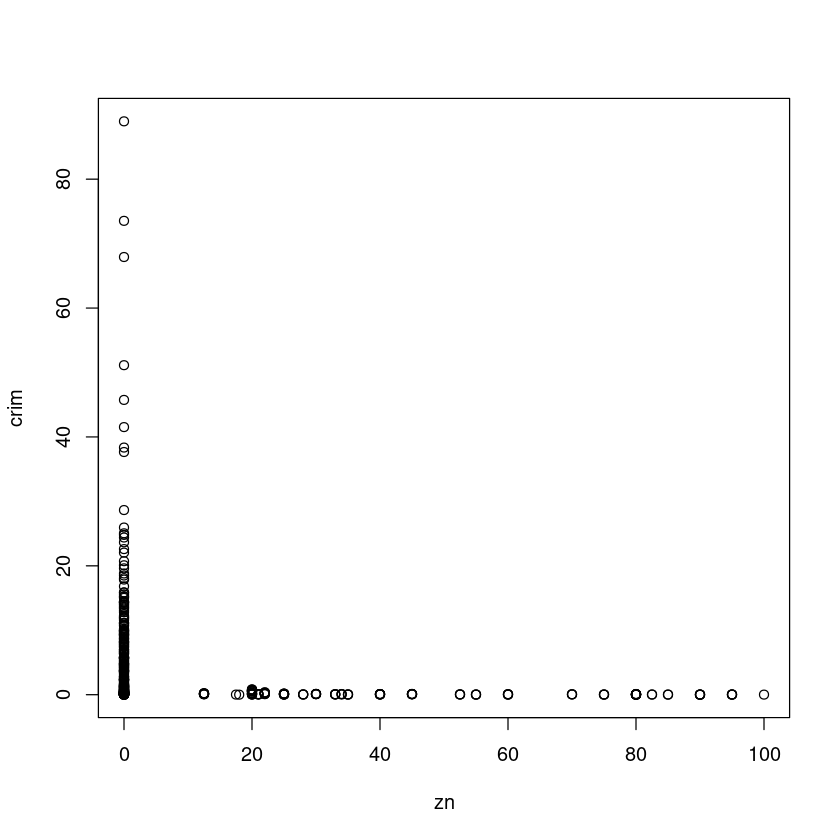

In [15]:
plot(crim ~ zn, Boston)

### Modelo 2 - crim ~ indus

In [16]:
modelo <- lm(crim ~ indus, Boston)
summary(modelo)


Call:
lm(formula = crim ~ indus, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.972  -2.698  -0.736   0.712  81.813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.06374    0.66723  -3.093  0.00209 ** 
indus        0.50978    0.05102   9.991  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.866 on 504 degrees of freedom
Multiple R-squared:  0.1653,	Adjusted R-squared:  0.1637 
F-statistic: 99.82 on 1 and 504 DF,  p-value: < 2.2e-16


1) A equação do modelo é crim = -2.06374 + 0.50978 * indus

2) Existe um relação significativa entre a varivel crim e indus

3) O R quadrado é 0.1637

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ indus

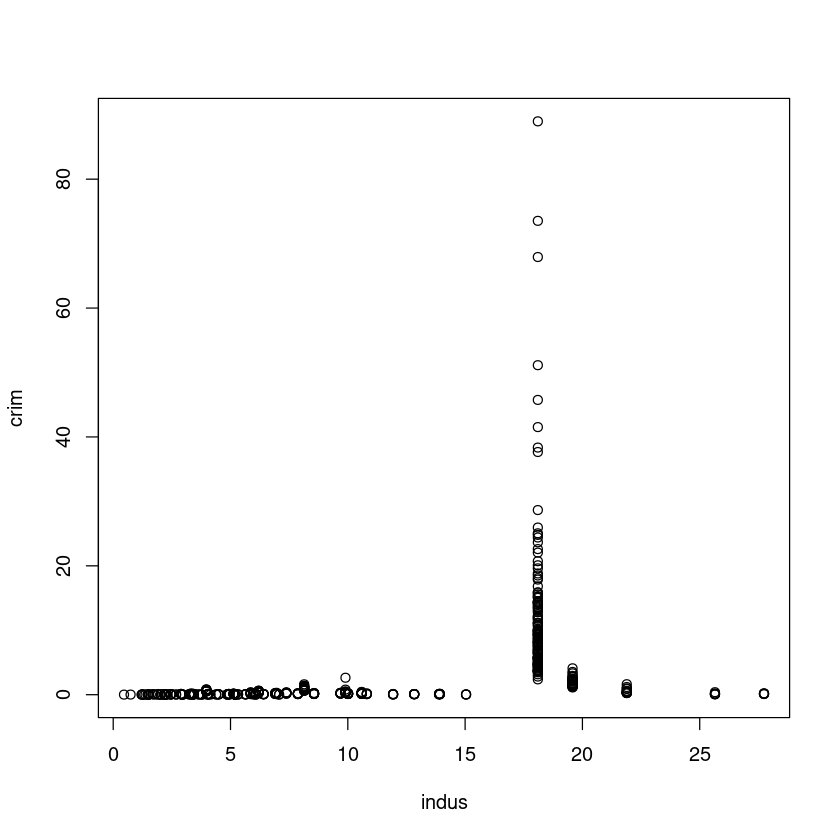

In [30]:
plot(crim ~ indus, Boston)

### Modelo 3 - crim ~ chas

In [17]:
modelo <- lm(crim ~ chas, Boston)
summary(modelo)


Call:
lm(formula = crim ~ chas, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-3.738 -3.661 -3.435  0.018 85.232 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7444     0.3961   9.453   <2e-16 ***
chas         -1.8928     1.5061  -1.257    0.209    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.597 on 504 degrees of freedom
Multiple R-squared:  0.003124,	Adjusted R-squared:  0.001146 
F-statistic: 1.579 on 1 and 504 DF,  p-value: 0.2094


1) Visto que p-valor e superior a 5% então a regressão não existe.

### Gráfico de crim ~ chas

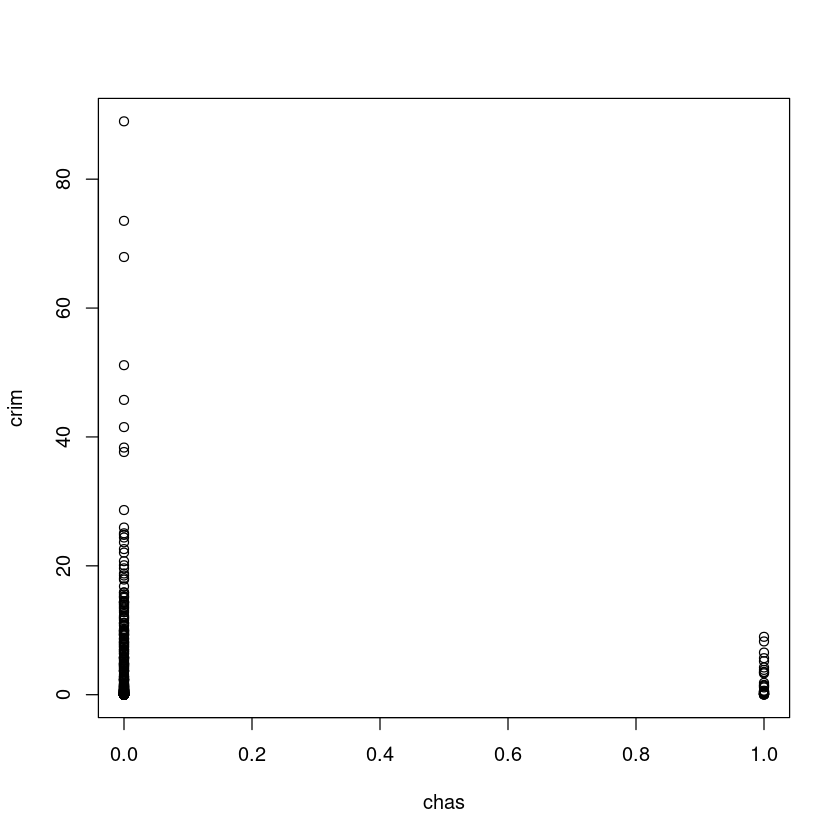

In [31]:
plot(crim ~ chas, Boston)

### Modelo 4 - crim ~ nox 

In [18]:
modelo <- lm(crim ~ nox, Boston)
summary(modelo)


Call:
lm(formula = crim ~ nox, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.371  -2.738  -0.974   0.559  81.728 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -13.720      1.699  -8.073 5.08e-15 ***
nox           31.249      2.999  10.419  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.81 on 504 degrees of freedom
Multiple R-squared:  0.1772,	Adjusted R-squared:  0.1756 
F-statistic: 108.6 on 1 and 504 DF,  p-value: < 2.2e-16


1) A equação do modelo é crim = -13.720 + 31.249 * nox

2) Existe um relação significativa entre a varivel crim e nox

3) O R quadrado é 0.1756

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ nox

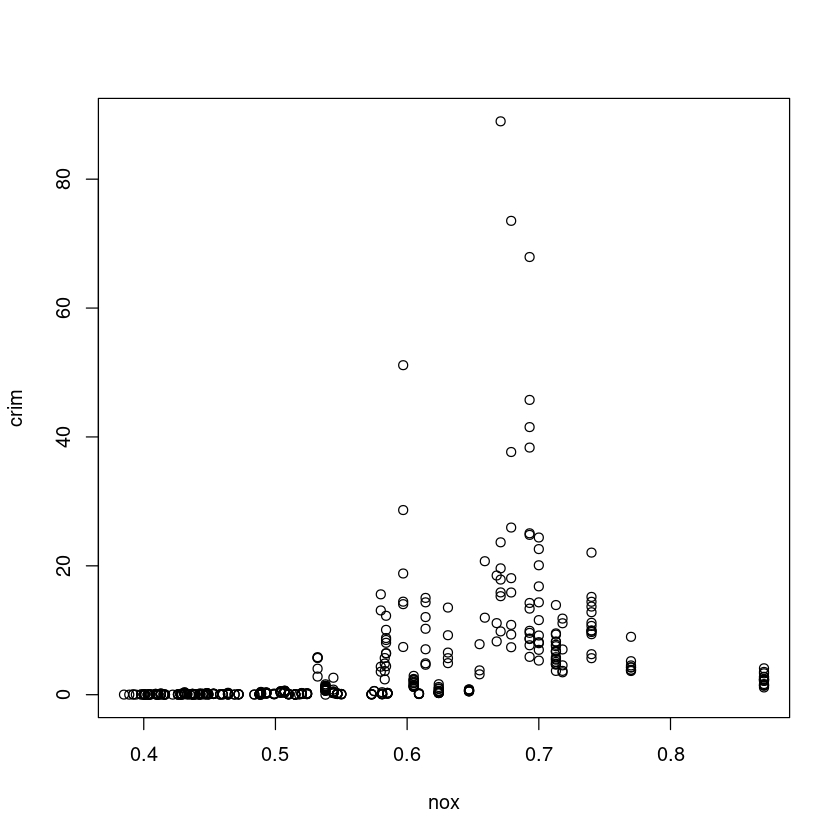

In [32]:
plot(crim ~ nox, Boston)

### Modelo 5 - crim ~ rm

In [19]:
modelo <- lm(crim ~ rm, Boston)
summary(modelo)


Call:
lm(formula = crim ~ rm, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.604 -3.952 -2.654  0.989 87.197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   20.482      3.365   6.088 2.27e-09 ***
rm            -2.684      0.532  -5.045 6.35e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.401 on 504 degrees of freedom
Multiple R-squared:  0.04807,	Adjusted R-squared:  0.04618 
F-statistic: 25.45 on 1 and 504 DF,  p-value: 6.347e-07


1) A equação do modelo é crim = 20.482 - 2.684 * rm

2) Existe um relação significativa entre a varivel crim e rm

3) O R quadrado é 0.04618

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ rm

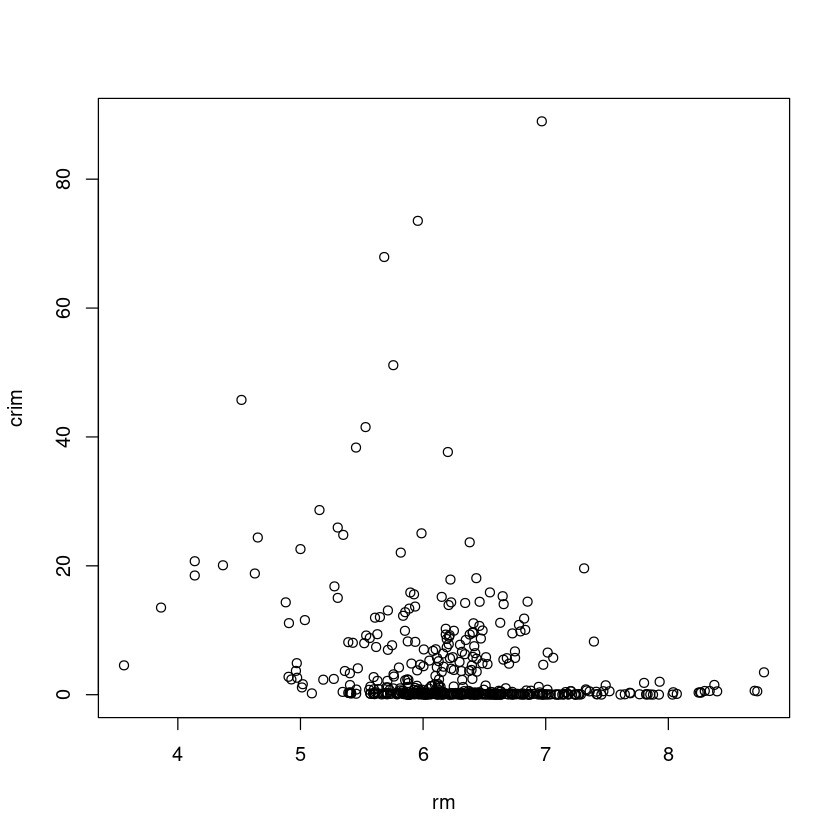

In [33]:
plot(crim ~ rm, Boston)

### Modelo 6 - crim ~ age

In [20]:
modelo <- lm(crim ~ age, Boston)
summary(modelo)


Call:
lm(formula = crim ~ age, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.789 -4.257 -1.230  1.527 82.849 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.77791    0.94398  -4.002 7.22e-05 ***
age          0.10779    0.01274   8.463 2.85e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.057 on 504 degrees of freedom
Multiple R-squared:  0.1244,	Adjusted R-squared:  0.1227 
F-statistic: 71.62 on 1 and 504 DF,  p-value: 2.855e-16


1) A equação do modelo é crim = -3.77791 + 0.10779 * age

2) Existe um relação significativa entre a varivel crim e age

3) O R quadrado é 0.1227

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ age

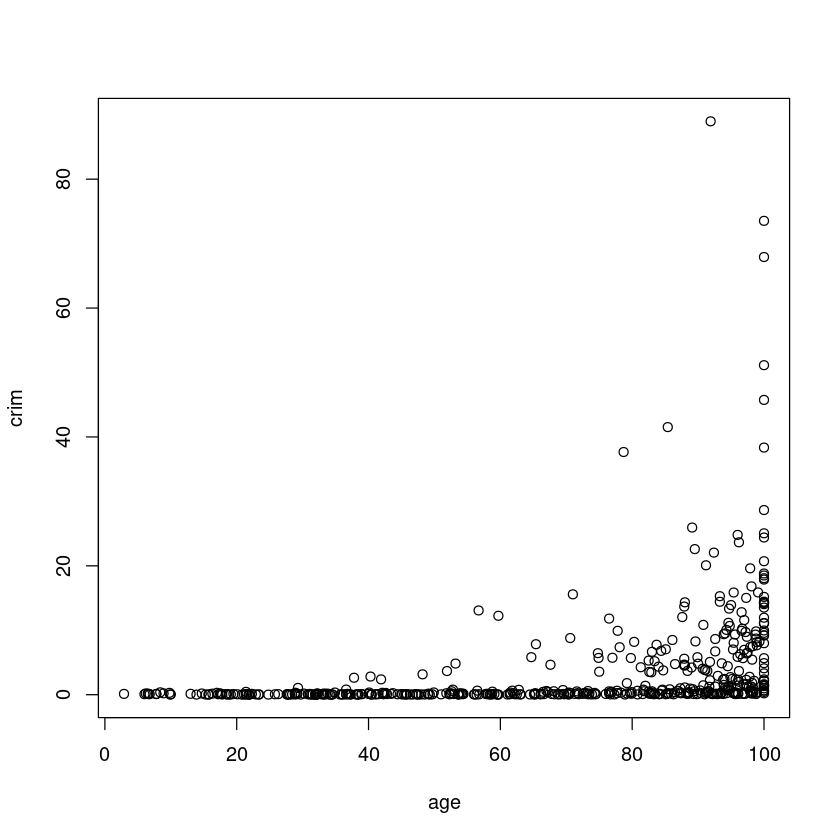

In [34]:
plot(crim ~ age, Boston)

### Modelo 7 - crim ~ dis

In [21]:
modelo <- lm(crim ~ dis, Boston)
summary(modelo)


Call:
lm(formula = crim ~ dis, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-6.708 -4.134 -1.527  1.516 81.674 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.4993     0.7304  13.006   <2e-16 ***
dis          -1.5509     0.1683  -9.213   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.965 on 504 degrees of freedom
Multiple R-squared:  0.1441,	Adjusted R-squared:  0.1425 
F-statistic: 84.89 on 1 and 504 DF,  p-value: < 2.2e-16


1) A equação do modelo é crim = 9.4993 - 1.5509 * dis

2) Existe um relação significativa entre a varivel crim e dis

3) O R quadrado é 0.1425

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ dis

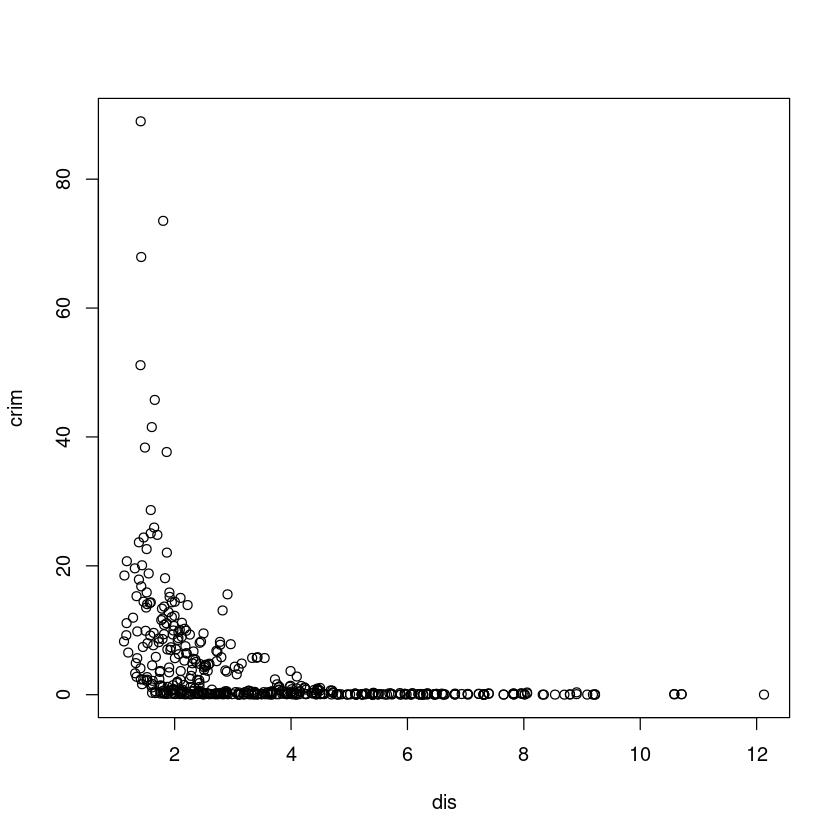

In [35]:
plot(crim ~ dis, Boston)

### Modelo 8 - crim ~ rad

In [22]:
modelo <- lm(crim ~ rad, Boston)
summary(modelo)


Call:
lm(formula = crim ~ rad, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.164  -1.381  -0.141   0.660  76.433 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.28716    0.44348  -5.157 3.61e-07 ***
rad          0.61791    0.03433  17.998  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.718 on 504 degrees of freedom
Multiple R-squared:  0.3913,	Adjusted R-squared:   0.39 
F-statistic: 323.9 on 1 and 504 DF,  p-value: < 2.2e-16


1) A equação do modelo é crim = -2.28716 - 0.61791 * rad

2) Existe um relação significativa entre a varivel crim e rad

3) O R quadrado é 0.39

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ rad

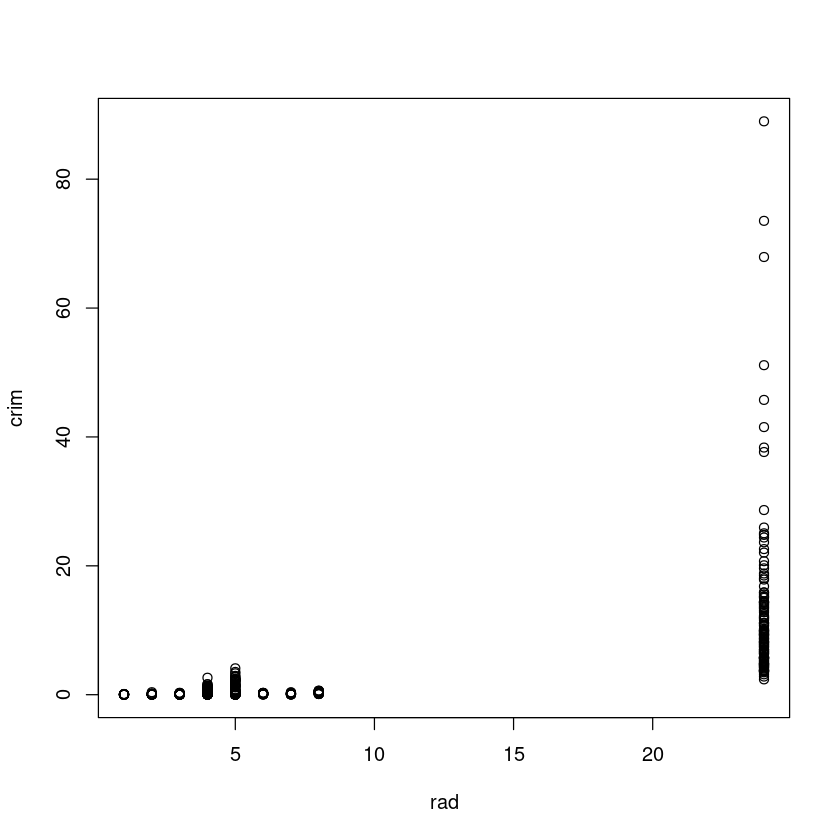

In [36]:
plot(crim ~ rad, Boston)

### Modelo 9 - crim ~ tax

In [23]:
modelo <- lm(crim ~ tax, Boston)
summary(modelo)


Call:
lm(formula = crim ~ tax, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-12.513  -2.738  -0.194   1.065  77.696 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.528369   0.815809  -10.45   <2e-16 ***
tax          0.029742   0.001847   16.10   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.997 on 504 degrees of freedom
Multiple R-squared:  0.3396,	Adjusted R-squared:  0.3383 
F-statistic: 259.2 on 1 and 504 DF,  p-value: < 2.2e-16


1) A equação do modelo é crim = -8.528369 - 0.029742 * tax

2) Existe um relação significativa entre a varivel crim e tax

3) O R quadrado é 0.3383

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ tax

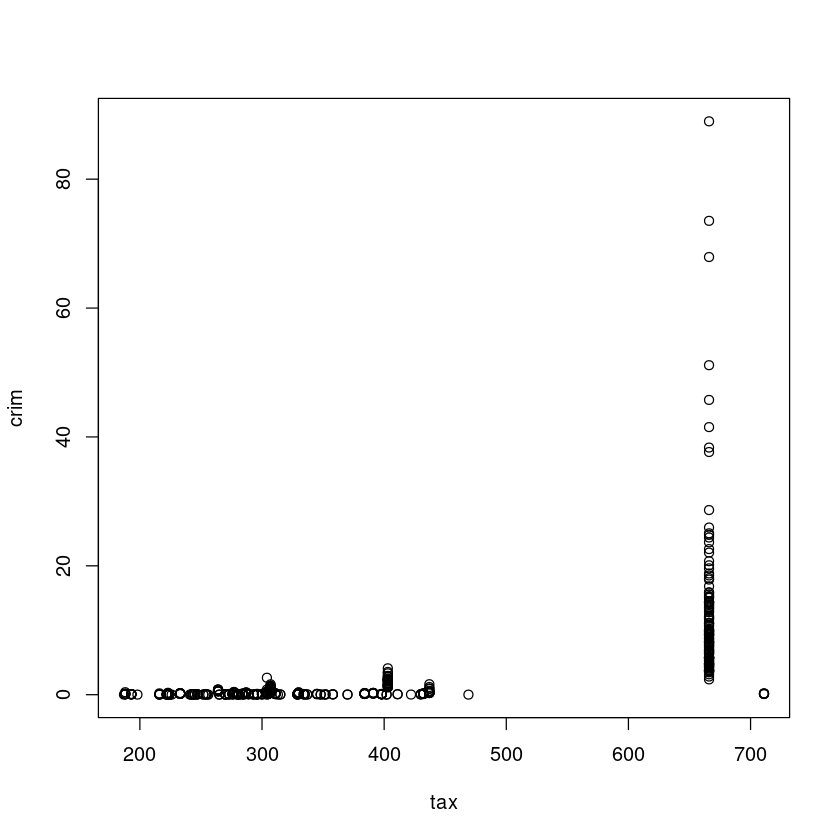

In [37]:
plot(crim ~ tax, Boston)

### Modelo 10 - crim ~ ptratio

In [24]:
modelo <- lm(crim ~ ptratio, Boston)
summary(modelo)


Call:
lm(formula = crim ~ ptratio, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-7.654 -3.985 -1.912  1.825 83.353 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.6469     3.1473  -5.607 3.40e-08 ***
ptratio       1.1520     0.1694   6.801 2.94e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 8.24 on 504 degrees of freedom
Multiple R-squared:  0.08407,	Adjusted R-squared:  0.08225 
F-statistic: 46.26 on 1 and 504 DF,  p-value: 2.943e-11


1) A equação do modelo é crim = -17.6469 + 1.1520 * ptratio

2) Existe um relação significativa entre a varivel crim e ptratio

3) O R quadrado é 0.08225

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ ptratio

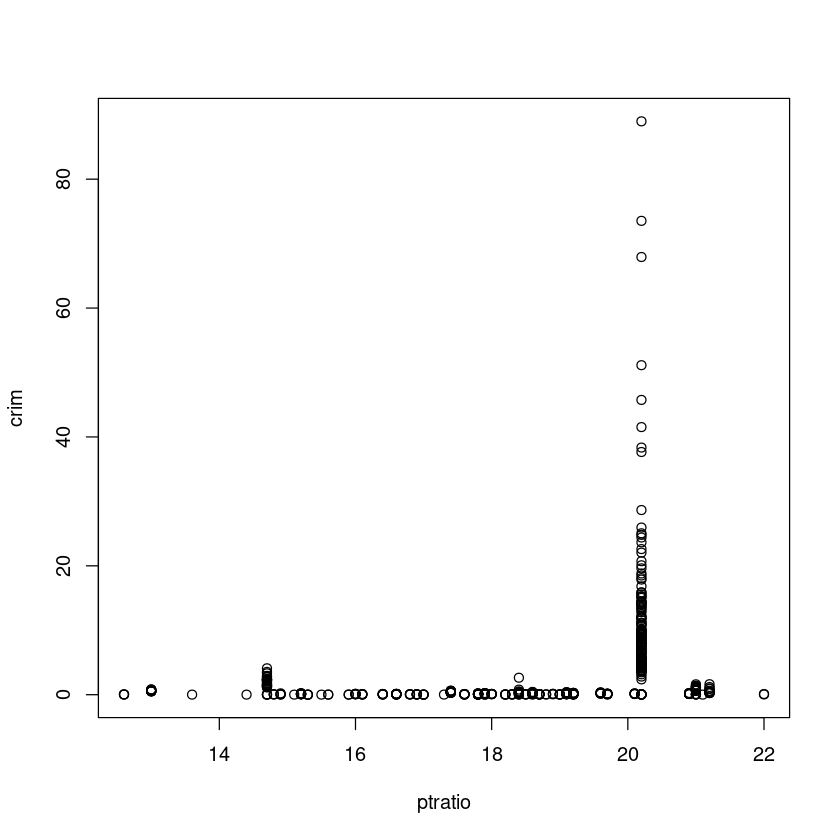

In [38]:
plot(crim ~ ptratio, Boston)

### Modelo 11 - crim ~ black

In [25]:
modelo <- lm(crim ~ black, Boston)
summary(modelo)


Call:
lm(formula = crim ~ black, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.756  -2.299  -2.095  -1.296  86.822 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 16.553529   1.425903  11.609   <2e-16 ***
black       -0.036280   0.003873  -9.367   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.946 on 504 degrees of freedom
Multiple R-squared:  0.1483,	Adjusted R-squared:  0.1466 
F-statistic: 87.74 on 1 and 504 DF,  p-value: < 2.2e-16


1) A equação do modelo é crim = 16.553529 - 0.036280 * black

2) Existe um relação significativa entre a varivel crim e black

3) O R quadrado é 0.1466

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ black

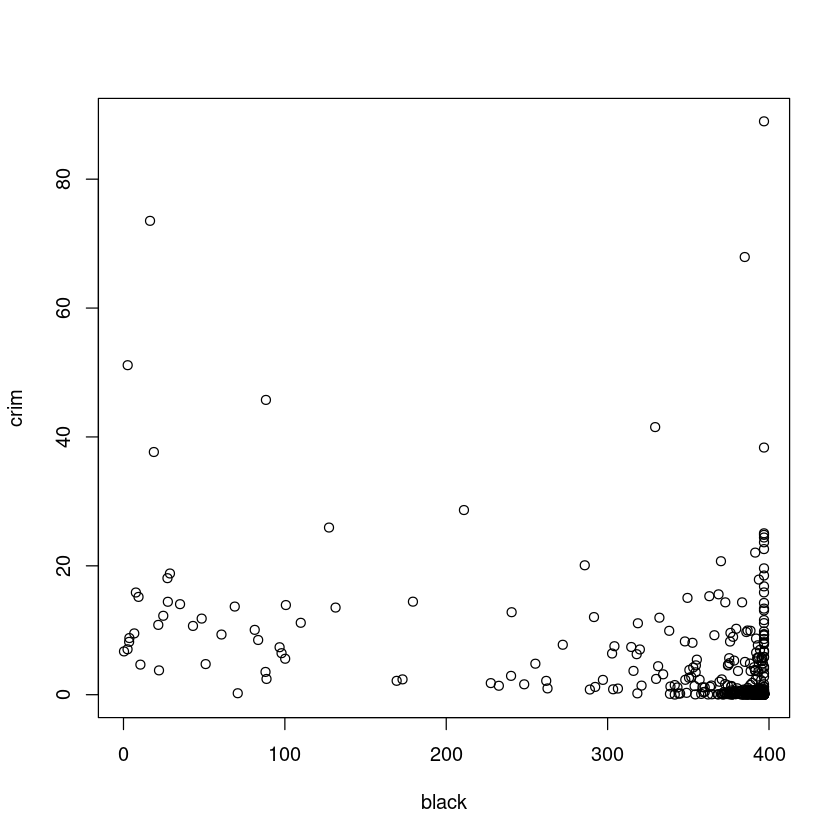

In [39]:
plot(crim ~ black, Boston)

### Modelo 12 - crim ~ lstat

In [26]:
modelo <- lm(crim ~ lstat, Boston)
summary(modelo)


Call:
lm(formula = crim ~ lstat, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-13.925  -2.822  -0.664   1.079  82.862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.33054    0.69376  -4.801 2.09e-06 ***
lstat        0.54880    0.04776  11.491  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.664 on 504 degrees of freedom
Multiple R-squared:  0.2076,	Adjusted R-squared:  0.206 
F-statistic:   132 on 1 and 504 DF,  p-value: < 2.2e-16


1) A equação do modelo é crim = -3.33054 - 0.54880 * lstat

2) Existe um relação significativa entre a varivel crim e lstat

3) O R quadrado é 0.206

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Grádico de crim ~ lstat

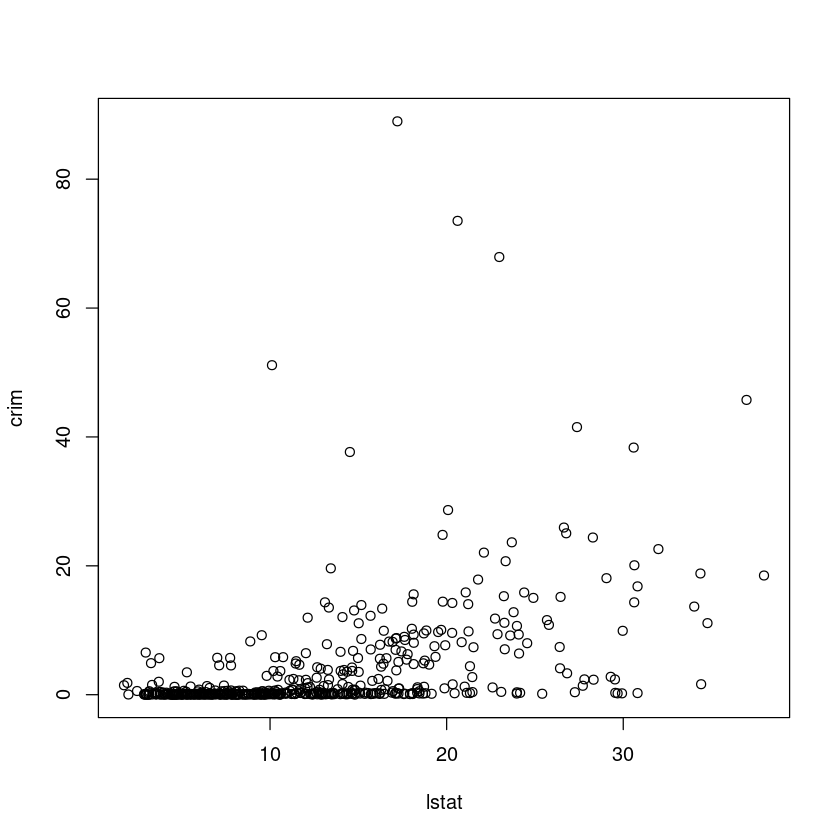

In [40]:
plot(crim ~ lstat, Boston)

### Modelo 13 - crim ~ medv

In [27]:
modelo <- lm(crim ~ medv, Boston)
summary(modelo)


Call:
lm(formula = crim ~ medv, data = Boston)

Residuals:
   Min     1Q Median     3Q    Max 
-9.071 -4.022 -2.343  1.298 80.957 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.79654    0.93419   12.63   <2e-16 ***
medv        -0.36316    0.03839   -9.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.934 on 504 degrees of freedom
Multiple R-squared:  0.1508,	Adjusted R-squared:  0.1491 
F-statistic: 89.49 on 1 and 504 DF,  p-value: < 2.2e-16


1) A equação do modelo é crim = 11.79654 - 0.36316 * medv

2) Existe um relação significativa entre a varivel crim e medv

3) O R quadrado é 0.1491

4) Visto que p-valor e inferior a 5% então a regressão existe e é significativa.

### Gráfico de crim ~ medv

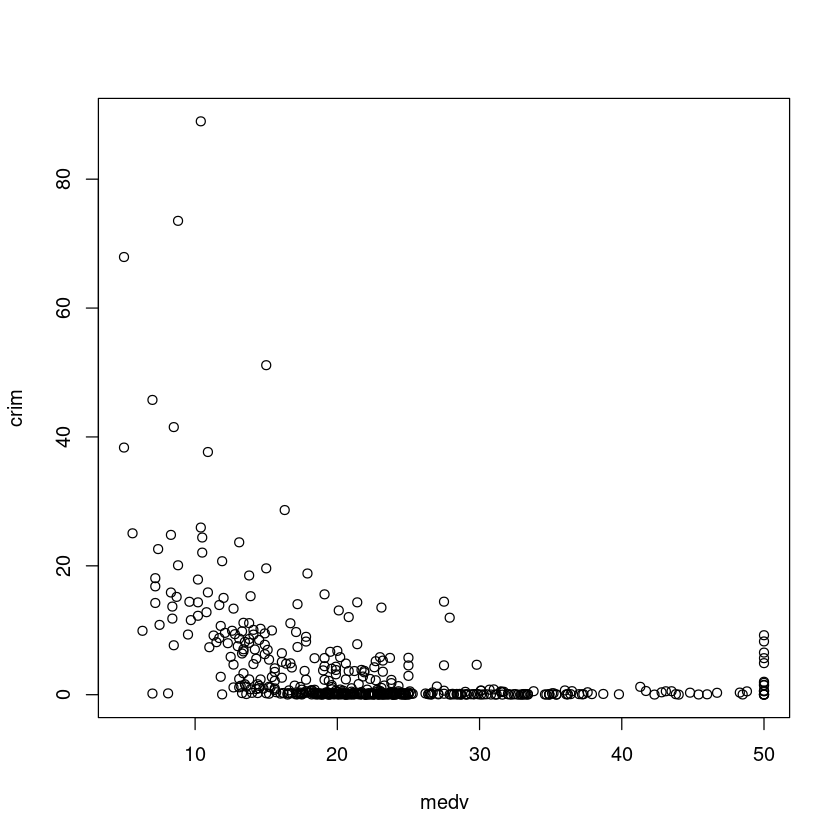

In [41]:
plot(crim ~ medv, Boston)

### Conclusão

1) nos modelos gerados apenas o modelo 3 sendo a relação entre as variáveis crim e chas não possue uma
relação siginificativa.

### Modelo de regressão linear multipla

In [43]:
modelo = lm(crim ~ ., Boston[,-14])
summary(modelo)


Call:
lm(formula = crim ~ ., data = Boston[, -14])

Residuals:
    Min      1Q  Median      3Q     Max 
-10.688  -1.888  -0.319   0.928  77.506 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.996664   6.979203   1.432 0.152677    
zn           0.036405   0.018740   1.943 0.052634 .  
indus       -0.069435   0.084215  -0.825 0.410053    
chas        -1.311667   1.179218  -1.112 0.266543    
nox         -6.928836   5.225214  -1.326 0.185441    
rm          -0.334794   0.572520  -0.585 0.558969    
age          0.001343   0.018102   0.074 0.940898    
dis         -0.708934   0.271459  -2.612 0.009287 ** 
rad          0.538916   0.087621   6.151  1.6e-09 ***
tax         -0.001356   0.005153  -0.263 0.792554    
ptratio     -0.083383   0.179244  -0.465 0.641999    
black       -0.009596   0.003655  -2.625 0.008932 ** 
lstat        0.235641   0.068684   3.431 0.000652 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standa

1) As variaveis que pode-se rejeitar a hipótese de Beta = 0 e que possuem relevancia no modelo são: 
(dis, rad, black, lstat)

2) Visto que o R quadrado ajustado e significativamente maior que nos modelos utilizando a regressão 
linear simples é possivel dizer que o crime e explicado devido junção de diversos fatores e não somente 
através de um fator isolado.

### Modelo final

In [14]:
modelo <- lm(crim ~ . -chas-rm-ptratio-age-indus-lstat-nox-tax, Boston)
summary(modelo)


Call:
lm(formula = crim ~ . - chas - rm - ptratio - age - indus - lstat - 
    nox - tax, data = Boston)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.553  -1.869  -0.358   0.839  75.744 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.919933   1.778986   4.452 1.05e-05 ***
zn           0.051799   0.017329   2.989 0.002935 ** 
dis         -0.672189   0.202939  -3.312 0.000992 ***
rad          0.472306   0.042102  11.218  < 2e-16 ***
black       -0.008211   0.003615  -2.271 0.023562 *  
medv        -0.174219   0.036295  -4.800 2.10e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.473 on 500 degrees of freedom
Multiple R-squared:  0.4393,	Adjusted R-squared:  0.4337 
F-statistic: 78.34 on 5 and 500 DF,  p-value: < 2.2e-16
